In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import nltk

In [13]:
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [12]:
from nltk.stem import WordNetLemmatizer
import nltk
import string
import pandas as pd
from collections import Counter
from wordcloud import STOPWORDS



In [4]:
# 데이터 불러오기
df = pd.read_csv('/content/sample_data/ready.csv')

In [18]:
# 데이터 불러오기
df = pd.read_csv('/content/sample_data/tokenized_data.csv')

In [20]:
df.head()

,Unnamed: 0,hotel,review,tokenized_text
0,0,호텔안테룸서울,the toilet and shower room were very clean the...,"['toilet', 'shower', 'room', 'clean', 'bathroo..."
1,1,호텔안테룸서울,all staff were very patient friendly and had g...,"['staff', 'patient', 'friendly', 'good', 'engl..."
2,2,호텔안테룸서울,all staff are very friendly there are also sta...,"['staff', 'friendly', 'also', 'staff', 'member..."
3,3,호텔안테룸서울,the accommodation is so clean and spotlessi wa...,"['accommodation', 'clean', 'spotlessi', 'happy..."
4,4,호텔안테룸서울,the room felt smaller than expected but the vi...,"['room', 'felt', 'smaller', 'expected', 'view'..."


In [22]:
import pandas as pd
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# 데이터 파일 읽기
df = pd.read_csv("/content/sample_data/tokenized_data.csv")

# Porter 알고리즘을 사용한 어간 추출기 생성
stemmer = PorterStemmer()

# 토큰화된 텍스트에서 어간 추출하여 새로운 열에 추가
df['stemmed_text'] = df['tokenized_text'].apply(lambda tokens: [stemmer.stem(token) for token in word_tokenize(tokens)])

# 결과 확인
print(df.head())

# 엑셀 파일로 저장
df.to_excel("stemmed_data.xlsx", index=False)



   Unnamed: 0    hotel                                             review  \
0           0  호텔안테룸서울  the toilet and shower room were very clean the...   
1           1  호텔안테룸서울  all staff were very patient friendly and had g...   
2           2  호텔안테룸서울  all staff are very friendly there are also sta...   
3           3  호텔안테룸서울  the accommodation is so clean and spotlessi wa...   
4           4  호텔안테룸서울  the room felt smaller than expected but the vi...   

                                      tokenized_text  \
0  ['toilet', 'shower', 'room', 'clean', 'bathroo...   
1  ['staff', 'patient', 'friendly', 'good', 'engl...   
2  ['staff', 'friendly', 'also', 'staff', 'member...   
3  ['accommodation', 'clean', 'spotlessi', 'happy...   
4  ['room', 'felt', 'smaller', 'expected', 'view'...   

                                        stemmed_text  
0  [[, 'toilet, ', ,, 'shower, ', ,, 'room, ', ,,...  
1  [[, 'staff, ', ,, 'patient, ', ,, 'friendli, '...  
2  [[, 'staff, ', ,, 'friendli, ', 

In [17]:
import pandas as pd

# 데이터 파일 및 불용어 사전 파일 읽기
df = pd.read_csv("/content/sample_data/ready.csv")
stopwords_df = pd.read_csv("/content/sample_data/stopwords_dict2.csv")

# 불용어 리스트 생성
stopwords_list = stopwords_df['Word'].str.lower().tolist()  # 불용어를 소문자로 변환하여 리스트 생성

# 텍스트 데이터에서 불용어 제거
def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token for token in tokens if token.lower() not in stopwords_list]  # 소문자로 변환하여 비교
    return ' '.join(filtered_tokens)

# 'words' 열에 있는 텍스트 데이터에 불용어 제거 적용하여 새로운 열 생성
df['words_without_stopwords'] = df['words'].apply(remove_stopwords)

# 결과 확인
print(df.head())


   Unnamed: 0.1  Unnamed: 0    hotel          guest  \
0             0           0  호텔안테룸서울         그룹 여행객   
1             1           1  호텔안테룸서울        나홀로 여행객   
2             2           2  호텔안테룸서울         그룹 여행객   
3             3           3  호텔안테룸서울  청소년 동반 가족 여행객   
4             4           4  호텔안테룸서울        나홀로 여행객   

                                              review  length  \
0  The toilet and shower room were very clean The...     292   
1  All staff were very patient friendly and had g...      91   
2  All staff are very friendly There are also sta...     260   
3  The accommodation is so clean and spotlessI wa...     150   
4  The room felt smaller than expected but the vi...     157   

                                               words  sent_score  \
0  The toilet shower room clean The bathroom vent...      0.9253   
1  All staff patient friendly good English skill ...      0.7845   
2  All staff friendly There also staff member spe...      0.9488   
3  The accom

In [6]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv("/content/sample_data/ready.csv")

# CountVectorizer 인스턴스 생성
count_vect = CountVectorizer()

# 카운트 벡터화
feature_vect = count_vect.fit_transform(df['words'])

# 변환된 피처를 DataFrame으로 변환하여 출력
feature_df = pd.DataFrame(feature_vect.toarray(), columns=count_vect.get_feature_names_out())
print(feature_df)


       00  0000  00000200  01  010  0100  01000700  0145  01jan  02  ...  충무로  \
0       0     0         0   0    0     0         0     0      0   0  ...    0   
1       0     0         0   0    0     0         0     0      0   0  ...    0   
2       0     0         0   0    0     0         0     0      0   0  ...    0   
3       0     0         0   0    0     0         0     0      0   0  ...    0   
4       0     0         0   0    0     0         0     0      0   0  ...    0   
...    ..   ...       ...  ..  ...   ...       ...   ...    ...  ..  ...  ...   
64989   0     0         0   0    0     0         0     0      0   0  ...    0   
64990   0     0         0   0    0     0         0     0      0   0  ...    0   
64991   0     0         0   0    0     0         0     0      0   0  ...    0   
64992   0     0         0   0    0     0         0     0      0   0  ...    0   
64993   0     0         0   0    0     0         0     0      0   0  ...    0   

       친절하네요  콘서트  퀄리티인데  토

In [10]:
df.head()

,Unnamed: 0.1,Unnamed: 0,hotel,guest,review,length,words,sent_score
0,0,0,호텔안테룸서울,그룹 여행객,The toilet and shower room were very clean The...,292,The toilet shower room clean The bathroom vent...,0.9253
1,1,1,호텔안테룸서울,나홀로 여행객,All staff were very patient friendly and had g...,91,All staff patient friendly good English skill ...,0.7845
2,2,2,호텔안테룸서울,그룹 여행객,All staff are very friendly There are also sta...,260,All staff friendly There also staff member spe...,0.9488
3,3,3,호텔안테룸서울,청소년 동반 가족 여행객,The accommodation is so clean and spotlessI wa...,150,The accommodation clean spotlessI happy throug...,0.8074
4,4,4,호텔안테룸서울,나홀로 여행객,The room felt smaller than expected but the vi...,157,The room felt smaller expected view great terr...,0.9001


In [ ]:
lemmar = WordNetLemmatizer()
def LemTokens(tokens):
    return [lemmar.lemmatize(token) for token in tokens]

In [ ]:
remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

In [ ]:
# 특수 문자 제거 및 단어 원형 추출
def LemNormalize(text):
    # 텍스트 소문자 변경 후 특수 문자 제거
    text_new = text.lower().translate(remove_punct_dict)

    # 단어 토큰화
    word_tokens = nltk.word_tokenize(text_new)

    # 단어 원형 추출
    return LemTokens(word_tokens)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vect = TfidfVectorizer(stop_words='english' , ngram_range=(1,2),
                             tokenizer = LemNormalize, min_df=0.05, max_df=0.85)

# 피처 벡터화: TF-IDF
feature_vect = tfidf_vect.fit_transform(df['words'])

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [ ]:
print(feature_vect)

  (0, 43)	0.323664073956196
  (0, 17)	0.26380113784392034
  (0, 7)	0.3740785587843531
  (0, 42)	0.3273931459354777
  (0, 4)	0.3836946414501342
  (0, 8)	0.37381996504471443
  (0, 1)	0.41615374814594663
  (0, 6)	0.2517865078403465
  (0, 34)	0.23449126846151008
  (1, 15)	0.4475905717438822
  (1, 14)	0.6809352947161289
  (1, 40)	0.5796462753230142
  (2, 41)	0.39466969332415797
  (2, 16)	0.3330217020897397
  (2, 14)	0.33432899842539965
  (2, 40)	0.5691952236094497
  (2, 6)	0.25803265541618703
  (2, 34)	0.48061673512227676
  (3, 0)	0.698823553783116
  (3, 43)	0.5645785836270271
  (3, 6)	0.4392000268529552
  (4, 16)	0.9406473927055435
  (4, 34)	0.33938544841560736
  (5, 20)	0.30004258621980595
  (5, 49)	0.273939898759653
  :	:
  (64986, 28)	0.5705308573156247
  (64986, 29)	0.5161774816474614
  (64986, 15)	0.6387921009927902
  (64987, 28)	0.5681070921326661
  (64987, 43)	0.4800297968738248
  (64987, 8)	0.5544165581753143
  (64987, 6)	0.37342737714698865
  (64988, 46)	0.4358101108511113
  (6498

In [ ]:
from sklearn.cluster import DBSCAN

# DBSCAN 클러스터링 수행
dbscan = DBSCAN(eps=0.8, min_samples=3, metric='euclidean')  # 거리 측정 방법으로 유클리드 거리를 사용합니다.
dbscan.fit(feature_vect)

# 클러스터링 결과 확인
cluster_labels = dbscan.labels_
num_clusters = len(set(cluster_labels)) - (1 if -1 in cluster_labels else 0)
print('총 클러스터 개수:', num_clusters)

# 클러스터링 결과 출력
for cluster in range(num_clusters):
    print(f'Cluster {cluster}:')
    print(df[cluster_labels == cluster]['words'])


총 클러스터 개수: 3
Cluster 0:
0        The toilet shower room clean The bathroom vent...
1        All staff patient friendly good English skill ...
2        All staff friendly There also staff member spe...
3        The accommodation clean spotlessI happy throug...
4        The room felt smaller expected view great terr...
                               ...                        
64989                            I safe stay station close
64990    I go airport I chose nearby accommodation airp...
64991    Its close airport good amenity Because residen...
64992                                          I good rest
64993                             Its great amenity nearby
Name: words, Length: 63005, dtype: object
Cluster 1:
86               Rest comfortably It ’ s closest Garosugil
89                                                Its neat
221                                I booked sleep adequate
230      The important thing cleanliness I also liked c...
301      There almost soundproofing If

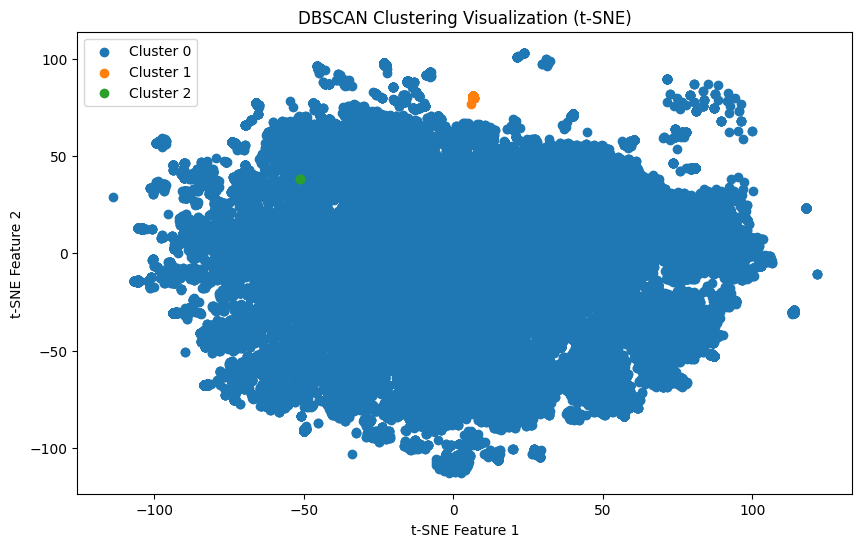

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# t-SNE를 사용하여 피처 벡터를 2차원으로 축소
tsne = TSNE(n_components=2, random_state=42)
feature_tsne = tsne.fit_transform(feature_vect.toarray())

# 클러스터링 결과와 함께 시각화
plt.figure(figsize=(10, 6))
for cluster in range(num_clusters):
    cluster_feature = feature_tsne[cluster_labels == cluster]
    plt.scatter(cluster_feature[:, 0], cluster_feature[:, 1], label=f'Cluster {cluster}')

plt.title('DBSCAN Clustering Visualization (t-SNE)')
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.legend()
plt.show()


In [ ]:
from sklearn.cluster import KMeans

WCSS=[]

kmeans 파라미터 요소. kmeans.fit 메서드에 넣어야 하는 데이터는 2차원 배열 형태로, 각 행(row)은 하나의 데이터 포인트를 나타내고, 각 열(column)은 해당 데이터 포인트의 특성(features)을 나타냅니다. 일반적으로 pandas DataFrame이나 numpy 배열 형태로 입력됩니다.

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

WCSS = []

# KMeans 클러스터링 및 inertia 값 계산
for i in range(3, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(feature_vect)
    inertia = kmeans.inertia_
    print('k:', i, 'inertia', inertia)
    WCSS.append(inertia)


k: 3 inertia 51232.695195535955
k: 4 inertia 49779.352649693916
k: 5 inertia 48364.59726705111
k: 6 inertia 47239.838082553644
k: 7 inertia 46001.31182070176
k: 8 inertia 44957.29785022745
k: 9 inertia 44386.29631408966
k: 10 inertia 43367.93430888938
k: 11 inertia 42771.55573713333
k: 12 inertia 41978.879354802084
k: 13 inertia 41149.16178789429
k: 14 inertia 40680.62474662988


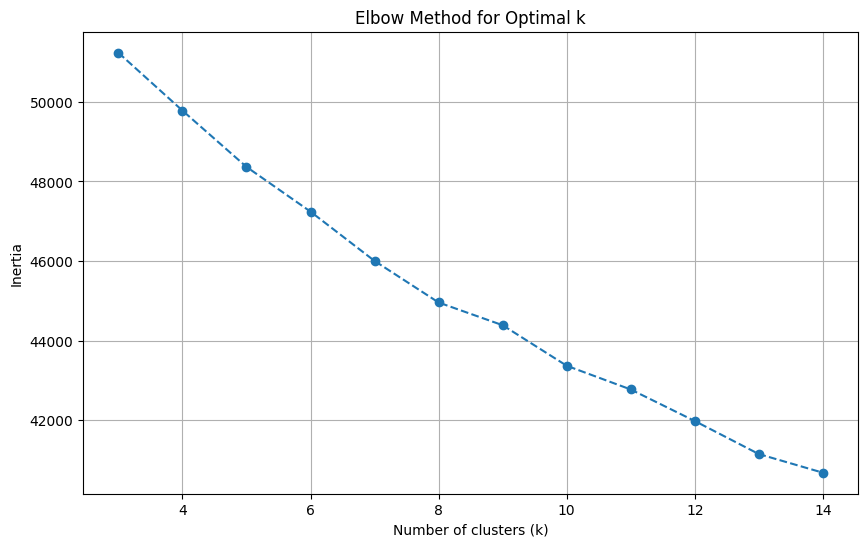

In [ ]:
# inertia 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(3, 15), WCSS, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouette_scores = []

# KMeans 클러스터링 및 실루엣 계수 계산
for i in range(5, 30):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(feature_vect)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(feature_vect, labels)
    silhouette_scores.append(silhouette_avg)

# 실루엣 계수 시각화
plt.figure(figsize=(10, 6))
plt.plot(range(5, 30), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method for Optimal k')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyboardInterrupt: 

중심값 연구.

In [ ]:
# KMeans: 5
km_cluster = KMeans(n_clusters=5, max_iter=10000, random_state=0)
km_cluster.fit(feature_vect)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=10000, n_clusters=5, random_state=0)

In [ ]:
# cluster 및 중심 좌표 정보
cluster_label = km_cluster.labels_
cluster_centers = km_cluster.cluster_centers_

In [ ]:

# cluster 라벨 추가
df['cluster_label'] = cluster_label
df.head()

,Unnamed: 0.1,Unnamed: 0,hotel,guest,review,length,words,sent_score,cluster_label
0,0,0,호텔안테룸서울,그룹 여행객,The toilet and shower room were very clean The...,292,The toilet shower room clean The bathroom vent...,0.9253,3
1,1,1,호텔안테룸서울,나홀로 여행객,All staff were very patient friendly and had g...,91,All staff patient friendly good English skill ...,0.7845,2
2,2,2,호텔안테룸서울,그룹 여행객,All staff are very friendly There are also sta...,260,All staff friendly There also staff member spe...,0.9488,2
3,3,3,호텔안테룸서울,청소년 동반 가족 여행객,The accommodation is so clean and spotlessI wa...,150,The accommodation clean spotlessI happy throug...,0.8074,3
4,4,4,호텔안테룸서울,나홀로 여행객,The room felt smaller than expected but the vi...,157,The room felt smaller expected view great terr...,0.9001,4


In [ ]:
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# CSV 파일 읽기
df = pd.read_csv("/content/sample_data/orange2.csv")


In [ ]:
df.head()

,hotel,review,words,PC1,PC2,Cluster
0,호텔안테룸서울,The toilet and shower room were very clean The...,The toilet shower room clean The bathroom vent...,3.246698,3.355764,C4
1,호텔안테룸서울,All staff were very patient friendly and had g...,All staff patient friendly good English skill ...,-1.522593,-0.695004,C2
2,호텔안테룸서울,All staff are very friendly There are also sta...,All staff friendly There also staff member spe...,2.293989,1.088354,C4
3,호텔안테룸서울,The accommodation is so clean and spotlessI wa...,The accommodation clean spotlessI happy throug...,5.398591,1.683520,C4
4,호텔안테룸서울,The room felt smaller than expected but the vi...,The room felt smaller expected view great terr...,2.887466,1.832312,C4


In [ ]:

# 불용어 제거를 위한 stopwords 다운로드
import nltk
nltk.download('stopwords')
nltk.download('punkt')

# 불용어 목록
stop_words = set(stopwords.words('english'))

# 어간 추출기 생성
stemmer = PorterStemmer()

# 클러스터링 결과에 따라 데이터를 그룹화
groups = df.groupby('Cluster')['words'].apply(list)

# 각 그룹별로 가장 빈번하게 등장하는 단어 찾기
for cluster, reviews in groups.items():
    # 그룹 내 모든 리뷰 텍스트를 하나의 문자열로 결합
    text = ' '.join(reviews)
    # 텍스트 토큰화 및 전처리
    tokens = word_tokenize(text.lower())
    filtered_tokens = [stemmer.stem(token) for token in tokens if token.isalnum() and token not in stop_words]
    # 가장 빈번하게 등장하는 단어 찾기
    word_counter = Counter(filtered_tokens)
    most_common_words = word_counter.most_common(5)  # 상위 5개 단어 추출
    print(f"Most common words in cluster {cluster}: {most_common_words}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Most common words in cluster C1: [('clean', 4722), ('nice', 1219), ('good', 1197), ('room', 1051), ('locat', 850)]
Most common words in cluster C2: [('good', 17693), ('locat', 14693), ('room', 14491), ('hotel', 14396), ('staff', 11546)]
Most common words in cluster C3: [('good', 2614), ('price', 2132), ('valu', 1731), ('money', 1577), ('locat', 987)]
Most common words in cluster C4: [('room', 14527), ('good', 10100), ('stay', 9014), ('clean', 8761), ('hotel', 8471)]


In [23]:
import pandas as pd

data=pd.read_csv('/content/sample_data/k=6.csv')
data.head()

,Unnamed: 0,hotel,review,tokenized_text,stemmed_text,cluster_label
0,0,호텔안테룸서울,the toilet and shower room were very clean the...,[toilet shower room clean bathroom ventilation...,[ toilet shower room clean bathroom ventil sys...,2
1,1,호텔안테룸서울,all staff were very patient friendly and had g...,[staff patient friendly good english skills he...,[ staff patient friendli good english skill he...,1
2,2,호텔안테룸서울,all staff are very friendly there are also sta...,[staff friendly also staff members speak littl...,[ staff friendli also staff member speak littl...,2
3,3,호텔안테룸서울,the accommodation is so clean and spotlessi wa...,[accommodation clean spotlessi happy throughou...,[ accommod clean spotlessi happi throughout st...,4
4,4,호텔안테룸서울,the room felt smaller than expected but the vi...,[room felt smaller expected view great terrace...,[ room felt smaller expect view great terrac g...,4


In [26]:
import pandas as pd
from collections import Counter

# 데이터 파일 읽기
df = pd.read_csv("/content/sample_data/k=6.csv")

# 각 클러스터에서 가장 빈도가 높은 상위 단어를 저장할 딕셔너리 생성
top_words_by_cluster = {}

# 클러스터 라벨링별로 그룹화
for cluster_label, cluster_df in df.groupby('cluster_label'):
    # 클러스터에 속한 모든 텍스트를 결합
    combined_text = ' '.join(cluster_df['tokenized_text'])

    # 결합된 텍스트를 토큰화하여 단어 빈도수 계산
    tokens = combined_text.split()
    word_counts = Counter(tokens)

    # 상위 빈도 단어 선택
    top_words = word_counts.most_common(5)  # 상위 5개 단어 선택
    top_words_by_cluster[cluster_label] = top_words

# 결과 출력
for cluster_label, top_words in top_words_by_cluster.items():
    print(f"Cluster {cluster_label} Top Words:")
    for word, count in top_words:
        print(f"{word}: {count}")
    print()


Cluster 0 Top Words:
room: 4544
hotel: 2357
good: 1431
also: 1244
like: 1122

Cluster 1 Top Words:
good: 15850
location: 4679
[good: 3853
good]: 3063
clean: 2920

Cluster 2 Top Words:
room: 11584
clean: 4622
good: 3805
staff: 3423
also: 2796

Cluster 3 Top Words:
hotel: 8938
room: 2261
staff: 2229
good: 2124
station: 2082

Cluster 4 Top Words:
clean: 4935
staff: 3485
location: 3381
great: 3053
hotel: 3046

Cluster 5 Top Words:
drinking: 135
eating: 4
rooms: 3
stay: 2
front: 2



In [38]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

# 데이터 파일 읽기
df = pd.read_csv("/content/sample_data/k=11.csv")

# TF-IDF 벡터화
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['tokenized_text'])

# KMeans 모델 학습
num_clusters = 11 # 클러스터 개수 설정
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)

# 각 클러스터의 중심 단어 추출
cluster_centers = kmeans.cluster_centers_
feature_names = tfidf_vectorizer.get_feature_names_out()

# 각 클러스터의 중심에 가장 가까운 단어 선택
top_words_by_cluster = {}
for i in range(num_clusters):
    cluster_center = cluster_centers[i]
    top_word_indices = cluster_center.argsort()[-5:][::-1]  # 상위 5개 단어 인덱스 선택
    top_words = [feature_names[idx] for idx in top_word_indices]
    top_words_by_cluster[i] = top_words

# 결과 출력
for cluster_label, top_words in top_words_by_cluster.items():
    print(f"Cluster {cluster_label} Top Words:")
    for word in top_words:
        print(word)
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster 0 Top Words:
facilities
stay
place
bathroom
spacious

Cluster 1 Top Words:
station
close
subway
convenient
near

Cluster 2 Top Words:
nearby
restaurants
convenience
station
convenient

Cluster 3 Top Words:
value
money
accommodation
breakfast
station

Cluster 4 Top Words:
accommodation
price
condition
comfortable
convenient

Cluster 5 Top Words:
quiet
comfortable
stay
place
accommodation

Cluster 6 Top Words:
service
facilities
price
cleanliness
condition

Cluster 7 Top Words:
rest
comfortable
comfortably
quiet
price

Cluster 8 Top Words:
comfortable
stay
place
bed
spacious

Cluster 9 Top Words:
breakfast
delicious
price
stay
buffet

Cluster 10 Top Words:
price
reasonable
facilities
cheap
stay

